In [1]:
library(EnvStats)
library(datarium)


Attaching package: ‘EnvStats’


The following objects are masked from ‘package:stats’:

    predict, predict.lm


The following object is masked from ‘package:base’:

    print.default




# Statistické testy, kontingenční tabulky

**Obsah přednášky:**
- důležitá rozdělení 
    - zavedeme multinomické rozdělení zobecněním Bernoulliho resp. binomického rozdělení
- statistické testy
    - princip testování hypotéz
    - jednovýběrové testy (t test, $\chi^2$ test rozptylu, Wilcoxonův znaménkový test)
    - dvouvýběrové (t test, Welchův test, F test shody rozptylů, Mann-Whitney U test, Kolmogorov-Smirnov)
    - párové (t test, Pitmanův-Morganův párový test)
    - testy normality (Shapiro-Wilkův test, Kolmogorov-Smirnov, Jarque-Bera)
- korelační koeficienty
    - Pearson, Spearman
- kontingenční tabulky
    - matice pravděpodobnosti, kontingenční tabulka
    - Pearsonův $\chi^2$ test nezávislosti
    - test shody multinomických rozdělení
    - Fisherův faktoriálový (exaktní) test
    - McNemarův test symetrie

---

## Důležitá rozdělení
Abychom mohli pracovat s kontingenčními tabulkami, potřebujeme znát [multinomické rozdělení](https://en.wikipedia.org/wiki/Multinomial_distribution). Využijme znalosti z BI-PST.

### [**Bernoulliho rozdělení**](https://en.wikipedia.org/wiki/Bernoulli_distribution)
Buď $p\in[0,1]$. Nechť náhodná veličina $X$ nabývá pouze hodnot $0$ a $1$ a to s pravděpodobnostmi $p$ a $1-p$.

Pravděpodobnostní funkce takového rozdělení je

$$
\operatorname{P}(X=x) = p^x (1-p)^{1-x}, \quad x\in\{0,1\}.
$$

Pak říkáme, že $X$ má Bernoulliho (též alternativní) rozdělení s parametrem $p$. Píšeme $X\sim \mathrm{Bernoulli}(p)$. Platí 

$$
\mathrm{E}X = p, \qquad \operatorname{Var}X = p(1-p).
$$

**Použití:** binární veličiny, typicky hod mincí nebo pokusy se závěry *úspěch-neúspěch*.

### [**Kategorické rozdělení**](https://en.wikipedia.org/wiki/Categorical_distribution)
Buď $\mathbf{Y} = [Y_1,\ldots,Y_K]$ náhodný vektor takový, že právě jedna jeho složka nabývá hodnoty 1 a ostatní 0. Dále buď $\mathbf{p} = [p_1, \ldots, p_K]$ vektor nezáporných čísel jejichž součet je jedna. Buď pravděpodobnostní funkce

$$
\operatorname{P}(Y_1=y_1, \ldots, Y_K=y_k) = p_1^{y_1} \cdots p_K^{y_K}.
$$

Pak říkáme, že $\mathbf{Y}$ má kategorické rozdělení s parametrem $\mathbf{p}$. Píšeme $\mathbf{Y}\sim \mathrm{Cat}(\mathbf{p})$. Platí 

$$
\mathrm{E}Y_i = p_i, \qquad \operatorname{Var}Y_i = p_i(1-p_i), \quad i=1,\ldots,K.
$$

**Použití:** alternativa k Bernoulliho rozdělení při více možných výsledcích.

**Úkol:** ukažte, že Bernoulliho rozdělení je speciální případ kategorického.

### [**Binomické rozdělení**](https://en.wikipedia.org/wiki/Binomial_distribution)
Buď $n\in\mathbb{N}$ a $p\in(0,1)$. Dále buď $X$ náhodná veličina nabývající pouze hodnot z množiny $\{0,1,\ldots,n\}$, a to s pravděpodobnostmi předepsanými pravděpodobnostní funkcí

$$
\operatorname{P}(X=k) = \binom{n}{k}p^k (1-p)^{n-k}, \qquad k=0,1,\ldots,n.
$$

Pak říkáme, že $X$ má binomické rozdělení s parametry $n$ a $p$. Píšeme $X\sim \mathrm{Bi}(n, p)$. Platí 

$$
\mathrm{E}X = np, \qquad \operatorname{Var}X = np(1-p).
$$

**Použití:** Binomické rozdělení popisuje výsledek $n$ Bernoulliho experimentů. Např. $n$ hodů mincí, kdy padne $k$-krát panna, $n$ pingů s $k$ úspěchy apod.

### [**Multinomické rozdělení**](https://en.wikipedia.org/wiki/Multinomial_distribution)
Buď $n\in\mathcal{N}$ a $\mathbf{p} = [p_1, \ldots, p_K]$ vektor nezáporných čísel jejichž součet je jedna. Uvažujme $\mathbf{Y} = [Y_1,\ldots,Y_K]$ náhodný vektor, jehož složky jsou nezáporná celá čísla a $Y_1 + \ldots + Y_K = n$. Buď pravděpodobnostní funkce

$$
\operatorname{P}(Y_1=y_1,\ldots, Y_K=y_K) = \frac{n!}{y_1! \cdots y_K!} p_1^{y_1} \cdots p_K^{y_K}.
$$

Pak říkáme, že $\mathbf{Y}$ má multinomické rozdělení s parametrem $\mathbf{p}$. Píšeme $\mathbf{Y}\sim \mathrm{Multi}(\mathbf{p})$. Platí 

$$
\mathrm{E}Y_i = np_i, \qquad \operatorname{Var}Y_i = np_i(1-p_i), \qquad i=1,\ldots,K.
$$

**Použití:** alternativa k binomickému rozdělení při více možných třídách/kategoriích výsledků. Jednotlivé složky odpovídají absolutním četnostem kategorií.

**Úkol:** ukažte, že binomické rozdělení je speciální případ multinomického.

---

# Testování hypotéz - recap BI-PST

Předpokládejme náhodnou veličinu $X$, jejíž rozdělení závisí na neznámém parametru $\theta\in\Omega$, kde $\Omega \subset \mathbb{R}$. Máme testovat, zda $\theta$ má hodnotu $\theta_0\in\Omega$. Potom zavádíme:
- $H_0: \theta = \theta_0$
- $H_A: \theta \ne \theta_0$
    
Test se provede následovně:
- na základě náhodného výběru z $X$ najdeme kritický obor $W$
- pokud $\theta_0\in W$, zamítneme $H_0$ ve prospěch $H_A$
- pokud $\theta_0\notin W$, nezamítneme $H_0$

|  | Platí $H_0$ | Platí $H_A$ |
| --- | --- | --- |
| Nezamítáme $H_0$ | <font color="green">Správné rozhodnutí</font> | <font color="red">Chyba 2. druhu</font> |
| Zamítáme $H_0$ | <font color="red">Chyba 1. druhu</font> | <font color="green">Správné rozhodnutí</font> |

Kritický obor se konstruuje tak, aby:
- chyba 1. druhu byla nejvýše $\alpha$, typicky 5% a méně (**hladina významnosti testu**),
- chyba 2. druhu byla minimální ([Neyman-Pearsonovo lemma](https://en.wikipedia.org/wiki/Neyman%E2%80%93Pearson_lemma))

Na BI-PST jsme namísto kritického oboru pracovali s **intervalem spolehlivosti** $\Omega\subset W$.

### Příklad konstrukce testu: Z-test

Buď $X_1, \ldots, X_n$ náhodný výběr z $N(\mu, \sigma^2)$ kde $\sigma^2>0$ je známý rozptyl. Máme testovat:
- $H_0: \mu = \mu_0$
- $H_A: \mu \ne \mu_0$

Hodnotu $\mu$ odhadneme pomocí

$$
\bar{X}_n = \frac{1}{n} \sum_{i=1}^n X_i.
$$

[Silný zákon velkých čísel](https://en.wikipedia.org/wiki/Law_of_large_numbers#Strong_law) zajišťuje konvergenci $\bar{X}_n$ k střední hodnotě $\mu$ pro $n\to\infty$. Bude-li $\bar{X}_n$ daleko od $\mu_0$, měl by test vést k zamítnutí nulové hypotézy. Kritický obor tedy bude vymezen vztahem

$$
|\bar{X}_n - \mu| \geq c,
$$

kde $c$ taková konstanta, že

$$
\alpha = \mathrm{P}(|\bar{X}_n - \mu_0| \geq c) = 
\mathrm{P}
\left(
\frac{|\bar{X}_n - \mu_0|}
     {\frac{\sigma}{\sqrt{n}}}
> \frac{c}{\frac{\sigma}{\sqrt{n}}}
\right)
= \mathrm{P}(|Z| \geq z_{\alpha/2}).
$$

Prakticky se test provede tak, že se vypočte **testová statistika** $Z = \frac{|\bar{X}_n - \mu_0| \sqrt{n}}{\sigma}$ a $H_0$ zamítneme, pokud $|Z| \geq z_{\alpha/2}$. Oboustranný $(1-\alpha)$% interval spolehlivosti dostaneme otočením nerovnosti ve vztahu výše,

$$
IS(\mu, \alpha) = \left(\bar{X}_n - \frac{z_{\alpha/2}\sigma}{\sqrt{n}}, \bar{X}_n + \frac{z_{\alpha/2}\sigma}{\sqrt{n}} \right).
$$

### Pečlivě rozmyslete
- jaký je vztah kritického oboru a intervalu spolehlivosti,
- jaký je rozdíl mezi testováním hypotéz pomocí intervalu spolehlivosti (BI-PST) a pomocí testové statistiky (BI-PRS a všude jinde),
- jak by se vše výše uvedené projevovalo na grafech hustoty.


### Doslov

V rámci *Praktická statistika* není možné se problematikou testování detailně zabývat. Některé detaily osvětlí časem jiné předměty (např. NI-VSM). Proto aspoň pár komentářů:
1. Základy (frekventistického) testování hypotéz pochází z části od Fishera na straně jedné a z části od Neymana a Pearsona na straně druhé. Jejich teorie byly výrazně odlišné a řada statistiků si na výsledný mix stěžovala (např. Tukey).
2. Uvedený způsob testování je **velmi citlivý na správnou interpretaci**!
3. Nulovou hypotézu buď *zamítáme* (angl. *reject*), pokud data mluví statisticky významně (angl. jsou *significant*) v její neprospěch. V opačném případě *nezamítáme* (angl. *fail to reject*). Pokud $H_0$ zamítáme, můžeme tvrdit, že tak činíme ve prospěch $H_A$. Statistický test nám ale neumožňuje jakoukoliv hypotézu přijmout či akceptovat.
4. Je třeba mít na paměti, že test typicky uvažuje určité vlastnosti modelu, např. normalitu, konečnost momentů apod.  Odchylky v tomto směru mohou mít dalekosáhlé následky.
5. V praxi je určujícím ukazatelem pro (ne)zamítnutí typicky *p* hodnota. Ta vyjadřuje **pravděpodobnost, že při platnosti $H_0$ nabyde testová statistika stávající či extrémnější (pro $H_0$ nepříznivější) hodnoty.** Není to pravděpodobnost platnosti $H_0$. Pozor na [dezinterpretace](https://en.wikipedia.org/wiki/Misuse_of_p-values)!
6. Pozor na úmyslné i neúmyslné [zneužívání statistiky](https://en.wikipedia.org/wiki/Misuse_of_statistics). Řadu fenoménů lze testovat různými testy s různými vlastnostmi (typicky silou). Často existují doporučení, který test vybrat. Je nepřijatelné zkoušet různé testy tak dlouho, dokud nenastane "vytoužený" výsledek!
7. Existují i jiné metody, např. bayesovské. Ty mohou mít výrazně snazší [interpretaci](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwiXqeKvkML9AhW1_rsIHXBqBBgQFnoECA4QAQ&url=https%3A%2F%2Fjkkweb.sitehost.iu.edu%2Farticles%2FKruschke2013JEPG.pdf&usg=AOvVaw06YZzXJJI2wZBiLFxYivnx), ale jde o úplně jinou filosofii.

---
## Jednovýběrové testy

V následujícím výkladu budeme systematicky používat dataset `sleep`, který je součástí R. Jeho popis z nápovědy:
> Data which show the effect of two soporific drugs (increase in hours of sleep compared to control) on 10 patients.

Pro jednovýběrové testy si vybereme jen data s `group==1`.

In [2]:
data <- subset(sleep, sleep$group==1)
print(data)

   extra group ID
1    0.7     1  1
2   -1.6     1  2
3   -0.2     1  3
4   -1.2     1  4
5   -0.1     1  5
6    3.4     1  6
7    3.7     1  7
8    0.8     1  8
9    0.0     1  9
10   2.0     1 10


### [Jednovýběrový t test](https://en.wikipedia.org/wiki/Student%27s_t-test#One-sample_t-test)

Buď dán iid náhodný výběr $X_1, \ldots, X_n \sim N(\mu, \sigma^2)$ kde $\sigma^2>0$ a $n\geq 2$, kde $\mu$ a $\sigma^2$ jsou neznámé parametry. Máme testovat hypotézu, zda je $\mu$ rovno nějakému číslu $\mu_0$ oproti alternativě, že není,

- $H_0$: $\mu = \mu_0$
- $H_A$: $\mu \ne \mu_0$

Test je založen na statistice

$$
T = \frac{\bar{X}_n - \mu_0}{s_n} \sqrt{n}.
$$

Pokud $|T| \geq t_{n-1}(\alpha/2)$, nulovou hypotézu zamítneme.

Otestujme, zda střední hodnota u první skupiny je rovna 0 (tj. $\mu_0=0$):

In [3]:
t.test(x=data$extra, mu=0)


	One Sample t-test

data:  data$extra
t = 1.3257, df = 9, p-value = 0.2176
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.5297804  2.0297804
sample estimates:
mean of x 
     0.75 


R nám vrátilo hodnotu testové statistiky (`t`), stupňů volnosti (`df`) a p-hodnotu. Dále zopakovalo alternativu (poznáme stranovost), vypsalo příslušný interval spolehlivosti pro $\mu$ a bodový odhad (průměr). Na základě p-hodnoty můžeme rozhodnout, že nulovou hypotézu na standardní hladině významnosti 5% **nezamítneme** (p-hodnota je větší než 0.05).

Obdobně můžeme testovat pravostrannou variantu, tj. oproti alternativě, že střední hodnota je větší než nějaké číslo $\mu_0$.

- $H_0$: $\mu = \mu_0$
- $H_A$: $\mu > \mu_0$

Testová statistika se nezmění. Jde nyní o pravostranný test, $H_0$ zamítneme, pokud $T \geq t_{n-1}(\alpha)$ (<font color='red'>Zdůvodněte!</font>).

Použijme stejná data, testujme opět hodnotu $\mu_0 = 0$:

In [4]:
t.test(x=data$extra, mu=0, alternative='greater')


	One Sample t-test

data:  data$extra
t = 1.3257, df = 9, p-value = 0.1088
alternative hypothesis: true mean is greater than 0
95 percent confidence interval:
 -0.2870553        Inf
sample estimates:
mean of x 
     0.75 


Ani teď na hladině 5% nulovou hypotézu nezamítáme.

### [$\chi^2$ test rozptylu normálního rozdělení](https://en.wikipedia.org/wiki/Chi-squared_test#Pearson's_chi-squared_test) [[R link]](https://search.r-project.org/CRAN/refmans/EnvStats/html/varTest.html)

Buď dán iid náhodný výběr $X_1, \ldots, X_n \sim N(\mu, \sigma^2)$ kde $\sigma^2>0$ a $n\geq 2$, kde $\mu$ a $\sigma^2$ jsou neznámé parametry. Máme testovat hypotézu, zda je $\sigma^2$ rovno nějakému číslu $\sigma_0^2$ oproti alternativě, že není,

- $H_0$: $\sigma^2 = \sigma_0^2$
- $H_A$: $\sigma^2 \ne \sigma_0^2$ (alternativně jednostrannou)

Tento test je velmi citlivý na odchylky od normality!

Test je založen na $\chi^2$ statistice. Nosič (support) hustoty je kladná reálná poloosa a rozdělení není symetrické. V důsledku toho má testová statistika různou podobu pro levostranný, oboustranný a pravostranný test a je snazší posuzovat přítomnost testované hodnoty v příslušném intervalu spolehlivosti (viz BI-PST).

Otestujme, zda je rozptyl u první skupiny rovnen 1.5 (tj. $\sigma_0^2=1.5$):

In [5]:
varTest(x=data$extra, sigma.squared=1.5)

$statistic
Chi-Squared 
   19.20333 

$parameters
df 
 9 

$p.value
[1] 0.04703689

$estimate
variance 
3.200556 

$null.value
variance 
     1.5 

$alternative
[1] "two.sided"

$method
[1] "Chi-Squared Test on Variance"

$data.name
[1] "data$extra"

$conf.int
      LCL       UCL 
 1.514238 10.666980 
attr(,"conf.level")
[1] 0.95

attr(,"class")
[1] "htestEnvStats"

Na standardní hladině významnosti 5% zamítáme nulovou hypotézu (p-hodnota je menší než 0.05). Podobně bychom mohli provést i jednostranné testy.

### [Jednovýběrový Wilcoxonův znaménkový test](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test#One-sample_test) [[R link]](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/wilcox.test)

Buď $X_1, \ldots, X_n$ náhodný výběr ze spojitého rozdělení symetrického okolo mediánu $\tilde{x}$. Testujeme hypotézu
- $H_0$: $\tilde{x} = x_0$
- $H_A$: $\tilde{x} \ne x_0$ (alternativně jednostrannou)

Zamítnutí $H_0$ může nastat, pokud je medián významně odlišný od $x_0$, ale i pokud je rozdělení výrazně nesymetrické. Tento test je populárním příkladem neparametrického testu. Bez detailů uveďme, že je založen na analýze rozložení dat okolo testované hodnoty $x_0$. Pokud je rozdělení dostatečně symetrické a $x_0$ má být mediánem, potom musí být dostatečně blízko středu dat.

Otestujme, zda mají naše data medián -1 oproti alternativě, že medián je větší:

In [6]:
wilcox.test(x=data$extra, mu=-1, alternative='greater')


	Wilcoxon signed rank exact test

data:  data$extra
V = 52, p-value = 0.004883
alternative hypothesis: true location is greater than -1


Na standardní hladině významnosti zamítáme $H_0$. 
*Pozn.: zamítali bychom i na hladině 1%.*

---
## Dvouvýběrové testy

Uvažujme dva náhodné výběry:
- $X_1, \ldots, X_m$,
- $Y_1, \ldots, Y_n$.

Předpokládejme, že každý z nich je nezávislý (iid) a že oba jsou i nezávislé navzájem, $X_i \perp\mkern-15mu\perp Y_j$ pro všechna $i=1,\ldots,m$ a všechna $j=1,\ldots, n$. Dvouvýběrové testy se zpravidla zaměřují na testování shody středních hodnot, rozptylů či mediánů. Podle toho mají i specifické předpoklady.

### [Dvouvýběrový t test](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test) a [Welchův test](https://en.wikipedia.org/wiki/Welch%27s_t-test)

Označme $\mu_X$ a $\mu_Y$ střední hodnoty příslušných výběrů. Oba testy testují hypotézy

- $H_0$: $\mu_X = \mu_Y$
- $H_A$: $\mu_X \ne \mu_Y$ (alternativně jednostrannou).

Dvouvýběrový t test předpokládá, že výběry jsou z normálních rozdělení o stejných rozptylech, přičemž první podmínku můžeme otestovat nějakým testem normality a druhou F testem (viz níže). Alternativně lze použít Welchův t test, který rovněž předpokládá normalitu obou výběrů, nicméně předpoklad shody rozptylů nemá. Funkce `t.test()` obsahuje testy oba, přepínat mezi nimi můžeme pomocí parametru `var.equal`.

In [7]:
genderweight[c(1,2,39,40),]
t.test(weight ~ group, data=genderweight, var.equal=T)

,id,group,weight
,<fct>,<fct>,<dbl>
1,1,F,61.58587
2,2,F,64.55486
39,39,M,87.38138
40,40,M,86.43756



	Two Sample t-test

data:  weight by group
t = -20.791, df = 38, p-value < 2.2e-16
alternative hypothesis: true difference in means between group F and group M is not equal to 0
95 percent confidence interval:
 -24.50140 -20.15349
sample estimates:
mean in group F mean in group M 
       63.49867        85.82612 


Test vrací hodnotu testové statistiky $t$, stupně volnosti a p-hodnotu. Za povšimnutí stojí znění alternativní hypotézy - test je totiž o něco obecnější, než je uvedeno v hypotézách výše, a lze jej použít na otestování velikosti rozdílu středních hodnot. To je ale za hranicí našeho předmětu. Stejně tak fakt, že t testů pro neshodné  rozptyly existuje víc. Každopádně se doporučuje vybírat mezi **základním t testem či alternativou připouštějící nestejné rozptyly** až na základě testu shody rozptylů.

### F-test shody rozptylů

F test shody rozptylů předpokládá, že oba výběry jsou z normálního rozdělení s kladnými rozptyly $\sigma_X^2$ a $\sigma_Y^2$. Jeho hypotézy jsou

- $H_0$: $\sigma_X^2 = \sigma_Y^2$
- $H_A$: $\sigma_X^2 \ne \sigma_Y^2$ (alternativně jednostrannou)

Nulová hypotéza se zamítne, pokud

$$
\frac{S_X^2}{S_Y^2} \geq F_{m-1,n-1}\left(\alpha/2\right),
$$

kde značení $X$ a $Y$ se případně prohodí tak, aby zlomek měl hodnotu větší 1. $F_{m-1,n-1}(\alpha/2)$ je kritická hodnota [Fisherova-Snedecorova F rozdělení](https://en.wikipedia.org/wiki/F-distribution) s $(m-1)$ a $(n-1)$ stupni volnosti.

Tento test typicky použijeme, pokud se chceme přesvědčit o vhodnosti dvouvýběrového t testu, nebo pokud zjišťujeme, zda nějaká nově vyvíjená metoda či proces nemá větší rozptyl výsledků. Test je poměrně citlivý na odchylky od normality výběrů, je tedy vhodné normalitu ověřit (Shapirovým-Wilkovým testem, prostřednictvím Q-Q plotu apod.).

In [8]:
var.test(weight ~ group, data=genderweight)


	F test to compare two variances

data:  weight by group
F = 0.21692, num df = 19, denom df = 19, p-value = 0.001648
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.08585766 0.54802553
sample estimates:
ratio of variances 
         0.2169152 


Nulovou hypotézu o shodě rozptylů můžeme zřejmě na daném datasetu a standardní hladině významnosti zamítnout.

### [Mannův-Whitneyúv U test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) [[R link]](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/wilcox.test)

Předpokládáme, že oba výběry pocházejí ze spojitých rozdělení s distribučními funkcemi $F$ a $G$. Testujeme hypotézu

- $H_0$: $F=G$
- $H_A$: $F\ne G$

Jde tedy o test shody distribucí. Mannův-Whitneyúv test, též dvouvýběrový Wilcoxonův test, je neparametrický test. Je poněkud citlivý na posunutí, tj. případ $G(x) = F(x-\delta), \delta>0$, větší odchylky v tvaru či rozptylu. V tom případě je lepší zvolit např. Kolmogorovovův-Smirnovův (KS) test.

In [9]:
wilcox.test(weight ~ group, data=genderweight)


	Wilcoxon rank sum exact test

data:  weight by group
W = 0, p-value = 1.451e-11
alternative hypothesis: true location shift is not equal to 0


### [Kolmogorovovův-Smirnovův dvouvýběrový test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test#Two-sample_Kolmogorov%E2%80%93Smirnov_test) [[R link]](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/ks.test)

Předpokládáme, že oba výběry pocházejí ze spojitých rozdělení s distribučními funkcemi $F$ a $G$. Testujeme hypotézu

- $H_0$: $F=G$
- $H_A$: $F\ne G$

KS test porovnává empirické distribuční funkce obou rozdělení. Při platnosti nulové hypotézy nemá mezi nimi být statisticky významný rozdíl. S tímto testem se potkáme ještě u testů normality.

In [11]:
ks.test(weight ~ group, data=genderweight)

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


ERROR: Error in ks.test(weight ~ group, data = genderweight): argument "y" is missing, with no default


---
## Párové testy

V praxi se lze poměrně často potkat s dvojicemi veličin

$$
\begin{pmatrix}
X_1 \\ Y_1
\end{pmatrix}, \ldots,
\begin{pmatrix}
X_n \\ Y_n
\end{pmatrix},
$$

kde jednotlivé složky vektorů nejsou nezávislé, ale jednotlivé vektory už ano. Složky vektorů typicky popisují vlastnosti jednoho objektu (např. levé oko-pravé oko téhož pacienta, stav pacienta před terapií-po terapii). Vektory potom představují různé objekty (zde pacienty).

Párové testy ověřují, zda je mezi jednotlivými veličinami vektoru statisticky významný rozdíl. Obecně jsou založeny na veličinách

$$
Z_i = X_i - Y_i.
$$

Veličiny $Z_i$ potom testujeme běžnými jednovýběrovými testy, např. zda je střední hodnota, variance nebo medián roven nule.

Pozn.: [PairedData R package](https://www.rdocumentation.org/packages/PairedData/versions/0.9.1)

In [ ]:
library(PairedData)
data("mice2")
mice2

### [Párový t test](https://en.wikipedia.org/wiki/Student%27s_t-test#Dependent_t-test_for_paired_samples)

Pokud jsou $Z_i$ normálně rozdělená s kladným rozptylem, testujeme hypotézy

- $H_0: \operatorname{E}\!Z = \mu_Z$
- $H_A: \operatorname{E}\!Z \ne \mu_Z$

Jelikož $\operatorname{E}Z = \operatorname{E}X - \operatorname{E}Y$, odpovídá nulová hypotéza při testování $\mu_Z=0$ hypotéze $\operatorname{E}X = \operatorname{E}Y$. To je také nejběžněji prováděný test.

Výše uvedený test odpovídá jednovýběrovému t testu. Párovým jej nazýváme z důvodu principu jeho vzniku.

In [ ]:
t.test(mice2$before, mice2$after, data=sleep, paired=T)

### Pitmanův-Morganův test [[R link]](https://www.rdocumentation.org/packages/PairedData/versions/0.9.1/topics/pitman.morgan.test)

Jsou-li $Z_i$ normálně rozdělené veličiny, testujeme

- $H_0: \sigma_Z^2 = 0$
- $H_A: \sigma_Z^2 \ne 0$

To odpovídá nulové hypotéza $\sigma_X^2 = \sigma_Y^2$.

Výše uvedený test odpovídá jednovýběrovému testu rozptylu. Párovým jej nazýváme z důvodu principu jeho vzniku.

In [ ]:
#pitman.morgan.test.default
Var.test(x=mice2$before, y=mice2$after, paired=T)

---
## Porovnávání několika výběrů

Porovnávání několika výběrů bude součástí pozdějších přednášek na ANOVU.

---

## Testy korelačních koeficientů

### [Pearsonův lineární korelační koeficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

Buď $[X_1, Y_1]^\intercal, \ldots, [X_n, Y_n]^\intercal$ náhodný výběr z dvojrozměrného rozdělení. Označme výběrovou kovarianci $s_{xy}$ a dále výběrové rozptyly jednotlivých veličin $s_{X}^2$ a $s_{Y}^2$. Oba rozptyly budiž kladné. Výběrový Pearsonův (lineární) korelační koeficient je definován

$$
r = r_{XY} = \frac{s_{xy}}{\sqrt{s_{X}^2 s_{Y}^2}}.
$$

Rozsah hodnot a interpretace by měly být již zažité!

Často se zabýváme testem nulovosti (populačního!) Pearsonova korelačního koeficientu $\rho$ na základě výběru. Hypotézy typicky zní

- $H_0: \rho = 0$
- $H_A: \rho \ne 0$ (alternativně jednostranná varianta)

Za předpokladu normality výběru spočítáme testovou statistiku

$$
T = \frac{r}{1-r^2} \sqrt{n-1}
$$

a nulovou hypotézu zamítneme, pokud $|T| \geq t_{n-2}(\alpha/2)$. Test je totožný s testem hypotézy $\beta=0$ v lineárním regresním modelu $Y_i = \alpha + \beta x_i + \varepsilon_i$ (zdůvodněte!).

In [ ]:
cor(B201, B211, method='pearson')
cor.test(B201, B211, method='pearson')

### [Spearmanův pořadový korelační koeficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)

Spearmanův korelační koeficient je neparametrickou alternativou vhodnou zejména při porušení předpokladu normality výběru. Je postaven na vyšetření shody pořadí uspořádaných hodnot obou výběrů.

Uvažujme stejné značení jako v předchozím případě. Označme 
- $R_1, \ldots, R_n$ pořadí veličin $X_1, \ldots, X_n$
- $Q_1, \ldots, Q_n$ pořadí veličin $Y_1, \ldots, Y_n$

Výběrový Spearmanův korelační koeficient je definován jako výběrový Pearsonův korelační koeficient dvojic $[R_1, Q_1]^\intercal, \ldots, [R_n, Q_n]^\intercal$. Za určitých předpokladů jej lze počítat zjednoduššeným vztahem

$$
r_S = r_{RQ} = 1 - \frac{6}{n(n^2-1)} \sum_{i=1}^n (R_i - Q_i)^2.
$$

Testuje se opět

- $H_0: \rho_S = 0$
- $H_A: \rho_S \ne 0$ (alternativně jednostranná varianta)

Existuje několik variant testů, některé jsou postaveny přímo na hodnotě koeficientu, některé na studentizované statistice či asymptotické normalitě $r_S$. Tento detail proto vynecháme.

In [ ]:
cor(B201, B211, method='spearman')
cor.test(B201, B211, method='spearman')

---
## Testy normality

Uvažujme nezávislý náhodný výběr $X_1, \ldots, X_n$. Jak už jsme měli možnost poznat, značná část statistického aparátu se opírá o předpoklad normality tohoto výběru, tj. že pochází z normálního rozdělení $N(\mu, \sigma^2)$ kde $\mu$ je nějaká střední hodnota $\sigma^2$ kladný rozptyl.

V praxi je poměrně zásadní nejen zjišťovat, zda naměřená data mají či nemají (přibližně) normální rozdělení, ale i jak moc se případně od tohoto rozdělení vzdalují. Test normality by tedy mělo **vždy** doprovázet i nějaké další zhodnocení, např. jádrové odhady hustoty (KDE) a Q-Q grafy. Současně je třeba mít na paměti, že odstranění několika málo dat způsobujících odchylku od normality může i nemusí být nepřijatelnou manipulací s daty!

### [Shapirův-Wilkův test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) [[R link]](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/shapiro.test)

- $H_0$: $X_1,\ldots, X_n$ je výběr z normálního rozdělení
- $H_A$: neplatí $H_0$

Tento test je obecně nejdoporučovanější z testů normality pro svou sílu. Pokud je rozsah výběru veliký a test vyjde významně, tj. zamítá nulovou hypotézu, není od věci provést ještě posouzení Q-Q plotu. K zamítnutí může totiž dojít i kvůli malému počtu odchylných dat. Typicky to mohou způsobit outliery. Test je známý pro svou citlivost na duplicitní hodnoty v datech, kdy je lépe zvolit test jiný. Naopak patří mezi nejsilnější testy normality, následují jej [Anderson–Darling](https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test), [Kolmogorov–Smirnov](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test), [Lilliefors](https://en.wikipedia.org/wiki/Lilliefors_test) aj.

In [ ]:
shapiro.test(genderweight[genderweight$group=="M",]$weight)  # brute alternative to subset()

### [Kolmogorovovův-Smirnovův (KS) test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) [[R link]](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/ks.test)

KS test je poněkud obecnějším testem, a sice *testem dobré shody*. Uvažuje hypotézy

- $H_0$: $X_1,\ldots, X_n$ má spojitou distribuční funkci $F$ (např. normální)
- $H_A$: neplatí $H_0$

Testuje se, zda náhodný výběr odpovídá konkrétnímu vybranému rozdělení s danými parametry. To znamená, že například při testování normality musíme nulovou hypotézu definovat včetně parametrů. Většinou se použijí bodové odhady z výběru, což má ovšem jistá úskalí (vygooglujte si např. [Lillieforsův test](https://en.wikipedia.org/wiki/Lilliefors_test)). Tato problematika je již za hranicí BI-PRS.

In [ ]:
maleweight <- subset(genderweight, genderweight$group=="M")
ks.test(maleweight$weight, "pnorm", mean(maleweight$weight), sd(maleweight$weight))

### [Jarque-Berúv test](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test) [[R link]](https://www.rdocumentation.org/packages/tseries/versions/0.10-51/topics/jarque.bera.test)

Díky snadné implementaci poměrně populární test s hypotézami

- $H_0$: $X_1,\ldots, X_n$ je výběr z normálního rozdělení
- $H_A$: neplatí $H_0$

Test je založen na statistice ověřující, zda má výběr šikmost a špičatost shodnou s normálním rozdělením. JB test se vcelku často používá na analýzu reziduí lineární regrese a časořadových modelů. Test je méně silný než Shapiro-Wilk i než většina ostatních testů.

In [ ]:
library("tseries")
jarque.bera.test(maleweight$weight)

---

## Závěrem k testům

V rámci této přednášky byla představena určitá testová baterie, která ale ani v nejmenším není jakkoliv postačujícím výčtem možných testů. Ve statistice typicky testujeme vše možné - hodnoty regresních koeficientů, korelační koeficienty atd. Je tedy potřeba k problematice volby testů přistupovat zodpovědně, neboť neexistuje žádná jednoduchá "kuchařka".

Absolutně kritickou součástí statistického testování hypotéz je **správná interpretace**. Je nejen potřeba mít vhodně zdůvodněnou volbu modelu, nasazeného testu, vybrané alternativy, ale i bezchybně interpretovat výsledky testu. Zamítnutí nulové hypotézy neznamená, že tato je nutně nevalidní. Právě tak nezamítnutí neznačí její validitu. Obecně je potřeba se mít na pozoru zejména před jakýmikoliv tendencemi hypotézy přijímat.

---

# Kontingenční tabulky

Uvažujme diskrétně rozdělený náhodný vektor $[Y, Z]^\intercal$ kde $Y\in\{1,\ldots, r\}$ a $Z\in\{1,\ldots,c\}$. Buď $n_{ij}$ veličina označující počet případů $[Y=i, Z=j]$. Označme

$$
p_{ij} = \operatorname{P}(Y=i, Z=j).
$$

Matice $(p_{ij})$ je **maticí pravděpodobností** a matici $(n_{ij})$ nazveme **kontingenční tabulkou**. Z obrázku bude patrné značení řádkových či sloupcových **marginálních pravděpodobností** a **marginálních četností**.

<!-- img src="files/matice-konttab.png" / -->

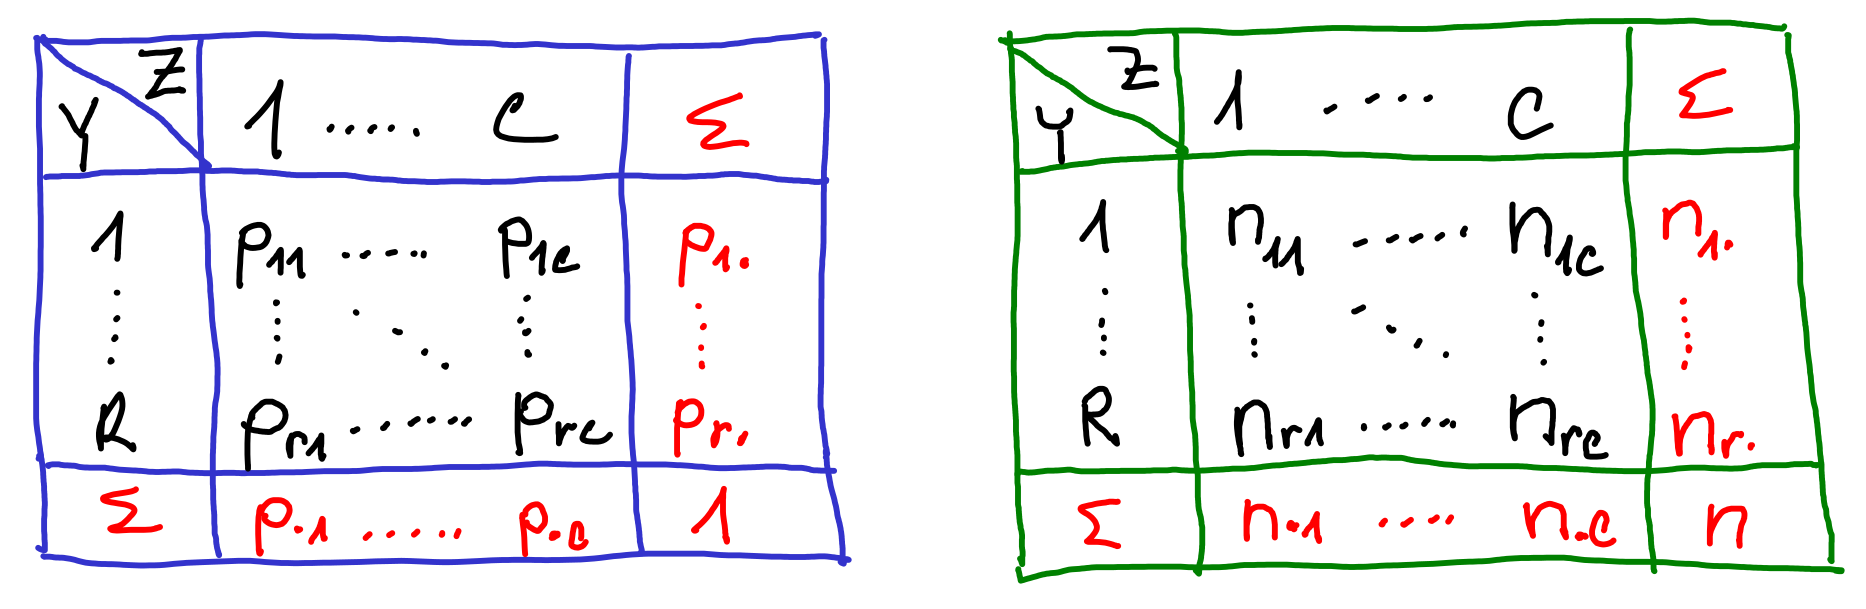

V praxi odpovídá kontingenční tabulka vztahu dvou znaků rozdělených do kategorií. Typickou kontingenční tabulkou je např. matice záměn v klasifikaci. Samozřejme mohou existovat i tabulky vyšších rozměrů. Pokud budeme sledovat vztah mezi znaky `medikace:ano/ne` a `krevní_tlak:změna/bez změny`, je tabulka 2x2. Pokud přidáme `pohlaví: muži/ženy`, pak bude tabulka 2x2x2 (tj. 2 tabulky po 2 znacích).

Statistika používá kontingenční tabulky k analýzám vztahů mezi znaky. Tyto analýzy typicky zahrnují nejen výpočty různých měr (senzitivita, specificita apod.), ale i testování nezávislosti znaků, řádkové homogenity, symetrie apod. Na některé testy se podíváme.

### Příklad kontingenční tabulky

Vezměme si výsledná hodnocení předmětu BI-PST ve dvou semestrech:

In [12]:
B221 <- c(30, 56, 66, 99, 41, 64)
B211 <- c(15, 49, 65, 71, 41, 43)
B201 <- c(28, 64, 62, 92, 44, 52)
pst <- rbind(B201, B211, B221)
colnames(pst) = LETTERS[1:6]

pst_ct <- as.table(pst)
addmargins(pst_ct)

,A,B,C,D,E,F,Sum
B201,28,64,62,92,44,52,342
B211,15,49,65,71,41,43,284
B221,30,56,66,99,41,64,356
Sum,73,169,193,262,126,159,982


Tabulku pravděpodobností pomocí R dostaneme následovně:

In [13]:
probs <- prop.table(pst_ct)
addmargins(probs)

,A,B,C,D,E,F,Sum
B201,0.02851324,0.06517312,0.06313646,0.09368635,0.04480652,0.05295316,0.3482688
B211,0.01527495,0.04989817,0.06619145,0.07230143,0.04175153,0.04378819,0.2892057
B221,0.03054990,0.05702648,0.06720978,0.10081466,0.04175153,0.06517312,0.3625255
Sum,0.07433809,0.17209776,0.19653768,0.26680244,0.12830957,0.16191446,1.0000000


**Mosaic plot** vizuálně napoví, jak je to s proporcemi jednotlivých známek:

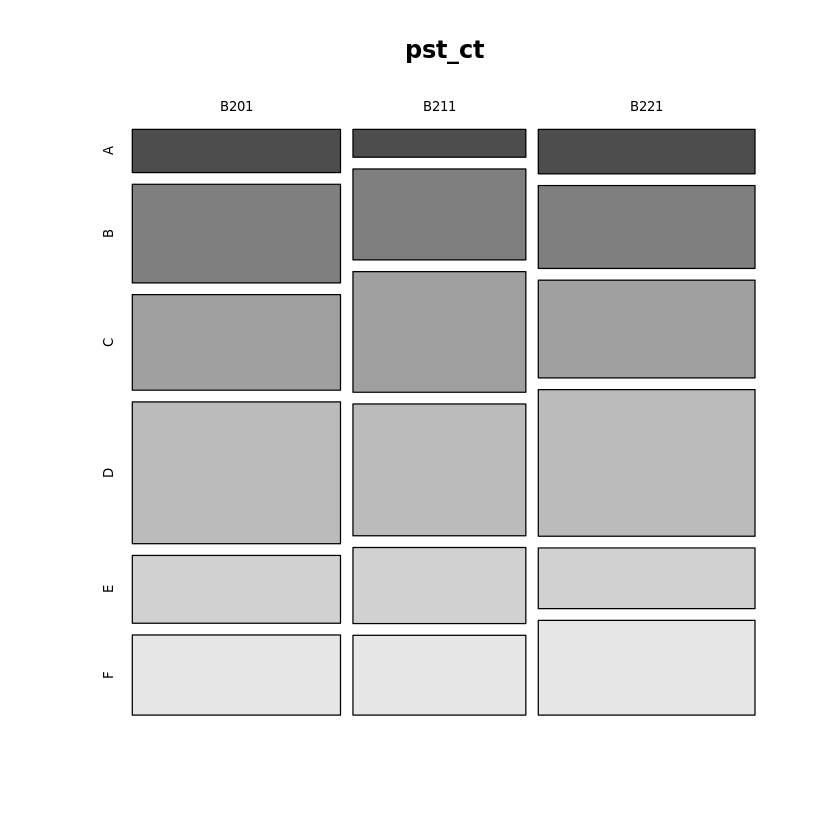

In [14]:
mosaicplot(pst_ct, color=T)           

### [Pearsonův $\chi^2$ test nezávislosti](https://en.wikipedia.org/wiki/Chi-squared_test) [[R link]](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/chisq.test)

- $H_0$: $p_{ij} = p_{i\cdot} p_{\cdot j}, \qquad i=1,\ldots,r; j=1,\ldots, c$
- $H_A$: neplatí $H_0$

Pearsonův $\chi^2$ test nezávislosti testuje, zda pro všechny dvojice $(i,j)$ platí $p_{ij} = p_{i\cdot} p_{\cdot j}$. Vypočtená testová statistika má $\chi^2$ rozdělení, k čemuž je ovšem potřeba, aby platilo, že pro všechna $(i,j)$ jsou teoretické četnosti $\frac{n_{i\cdot} n_{\cdot j}}{n}\geq 5$. Pokud podmínka není splněna, je lepší použít Fisherův faktoriálový test - viz níže.

Testová statistika má podobu

$$
\chi^2 = n \sum_{i=1}^r \sum_{j=1}^c \frac{n_{ij}^2}{n_{i\cdot} n_{\cdot j}} -n.
$$

Pokud $\chi^2 \geq \chi_{(r-1)(c-1)}^2(\alpha)$, nulová hypotéza se zamítne.

### Test homogenity multinomických rozdělení

- $H_0$: řádkové pravděpodobnosti $p_{i1}, \ldots, p_{i\cdot}$ nezávisí na $i$
- $H_A$: neplatí $H_0$

Tento test vychází z myšlenky, že každý řádek $i\in\{1,\ldots, r\}$ má multinomické rozdělení

$$
\mathrm{Multi}(n_{i\cdot}, p_{i1},\ldots,p_{ic}).
$$

Nulová hypotéza říká, že pravděpodobnosti $p_{i1},\ldots,p_{ic}$ **nezávisí** na řádkovém indexu, neboli že každý řádek je realizací téhož rozdělení. Tento test se provádí stejně, jako Pearsonův $\chi^2$ test nezávislosti výše.

In [15]:
out <- chisq.test(pst_ct)
out


	Pearson's Chi-squared test

data:  pst_ct
X-squared = 8.1734, df = 10, p-value = 0.6119


<br />
Můžeme i snadno spočítat, jaké při nezávislosti byly očekávané četnosti. Pozorované četnosti jsou

In [16]:
addmargins(out$observed)

,A,B,C,D,E,F,Sum
B201,28,64,62,92,44,52,342
B211,15,49,65,71,41,43,284
B221,30,56,66,99,41,64,356
Sum,73,169,193,262,126,159,982


Očekávané nám R spočítalo následovně:

In [17]:
addmargins(out$expected)

,A,B,C,D,E,F,Sum
B201,25.42363,58.85743,67.21589,91.24644,43.88187,55.37475,342
B211,21.11202,48.87576,55.81670,75.77189,36.43992,45.98371,284
B221,26.46436,61.26680,69.96741,94.98167,45.67821,57.64155,356
Sum,73.00000,169.00000,193.00000,262.00000,126.00000,159.00000,982


Velmi jednoduše řečeno, pokud by byly znaky nezávislé, pak pravděpodobnosti $p_{\cdot j}$ odpovídaly pravděpodobnostem jednotlivých známek a to nezávisle na semestru. Muselo by tedy rovněž platit, že pro semestr $i$ a známku $j$ je $n_{ij} = p_{\cdot j} n_{i \cdot}$ (srov. podmínku pro použitelnost testu!). Například pro $n_{11} = n_{\text{B201 A}}$:

Důležité je, že všechny očekávané četnosti, tedy odhady teoretických četností, jsou $\geq 5$, jak bylo požadováno.

### [Fisherův faktoriálový (též exaktní) test](https://en.wikipedia.org/wiki/Fisher%27s_exact_test) [[R link]](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/fisher.test)

- $H_0$: $p_{ij} = p_{i\cdot} p_{\cdot j}, \qquad i=1,\ldots,r; j=1,\ldots, c$
- $H_A$: neplatí $H_0$

Tento test používáme, pokud četnosti v tabulce příliš malé. Původně byl navržen pro čtyřpolní (2x2) tabulky, nicméně lze jej použít i pro tabulky větší. To má určitá omezení, viz nápověda.

Fisherův faktoriálový test je zatížen jistými [kontroverzemi](https://en.wikipedia.org/wiki/Fisher%27s_exact_test#Controversies), mj. to, že jeho hladina bývá mnohem nižší, než tolerovaná pravděpodobnost chyby prvního druhu. Pro větší data je rovněž výpočetně náročný.

### [McNemarův test symetrie](https://en.wikipedia.org/wiki/McNemar%27s_test) [[R link]](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/mcnemar.test)

Test pro tabulky 2x2 s hypotézami o symetrii
- $H_0$: $p(12) = p(21)$
- $H_A$: $p(12) \ne p(21)$

Typicky jej používáme pro porovnání výsledků dvou testů na témže vzorku, nebo na zjištění, zda určitý zásah vyvolal změnu. `mcnemar.test()` v R obsahuje i Bowkerovo rozšíření na větší než čtyřpolní tabulky.

Uvažujme situační studii 100 dětí ve věku 14 let. Sledujeme, zda uběhnou 1500m v čase do 6 minut. Měření provádíme nejprve bez předchozí přípravy a následně po sedmidenním tréninku. Výsledkem shrnuje následující kontingenční tabulka:

In [18]:
mat <- rbind(c(32, 5), 
             c(15, 48))
colnames(mat) = c("< 6min (training)", ">= 6min (training)")
rownames(mat) = c("< 6min (w/o train.)", ">= 6min (w/o train.)")

ct <- as.table(mat)
addmargins(ct)

,< 6min (training),>= 6min (training),Sum
< 6min (w/o train.),32,5,37
>= 6min (w/o train.),15,48,63
Sum,47,53,100


Z tabulky je patrné, že určitá část dětí si výkonnost udržela, několik dětí se přesunulo do kategorie pod 6 minut a pár dětí naopak, např. v důsledku tréninkové únavy či excesivního výsledku v prvním měření. Cílem je zjistit, zda se trénink způsobil statisticky významný rozdíl:

In [19]:
mcnemar.test(ct)


	McNemar's Chi-squared test with continuity correction

data:  ct
McNemar's chi-squared = 4.05, df = 1, p-value = 0.04417


---
---
